# Welcome to the course!

This is meant to be a very broad overview of machine learning topics, hopefully enough that you can hold a conversation about the topics we cover, but probably not enough to land a job as an ML engineer. There will be resources at the end if you want to learn more :) 

Please ask questions! We're going from 1 - 5 pm today and we'll take a few 10 minute breaks so we don't fall asleep. 

I cannot emphasize how broad the field is and how many different approaches there are to learning and implementing this stuff. My background is in statistics, so I think statisticians tend to do a little more supervised learning and regression / classification tasks, so that's mostly what I'm presenting here. Someone with a different background might do it completely differently!

## Pre-reqs
1. Watch this Essence of Linear Algebra playlist: https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab
2. Working intermediate Python knowledge (but if you're rusty that's okay, I am too)
   - in particular, basic understanding of numpy, pandas, scipy, statsmodels, scikitlearn
   - if you aren't familiar with some of these, that's okay too, just look over their documentation

# Notation 

Math can be scary, believe me, I understand. But fundamentally, machine learning is using some fancy-looking math to make predictions about things we're interested in. If you don't have a formal math background, that's okay too, but I want to get some concepts reviewed so you can make sense of formulas and notation you see in other resources.

This is the notation for a sum, the capital Greek letter sigma: $\sum$. The indices, the bottom and top number, indicate what you're starting at and where it ends. So for example 

$\sum_{x=0}^{3} x$ 

just means 0 + 1 + 2 + 3

This is a matrix, which is just a collection of numbers. Data can be represented in matrix format, and often is for machine learning purposes. 

\begin{pmatrix}
x_{11} & x_{12} \\
x_{21} & x_{22}
\end{pmatrix}

In [4]:
import numpy as np 

A = np.array([[1, 2], [3, 4]])
A

array([[1, 2],
       [3, 4]])

Mathematically, we'd write: 

$
A = 
\begin{pmatrix}
1 & 2  \\
3 & 4
\end{pmatrix}
$

Also note the subscripts, those are used pretty frequently to denote "different" objects of the same type. So we might want to compare means (averages) between two different groups of people. Instead of saying "mean of people x vs mean of people y" we usually just write this: 

$\mu_1$ vs. $\mu_2$

This is read as "mu 1 vs. mu 2" or "mu-sub-1 vs. mu-sub-2"

You will also often see a variety of letters used to denote "arbitrary" numbers. This sounds insane at first, because, why would we talk about hypothetical numbers? But they're often used to generalize models to an arbitrary number of variables, parameters, whatever. For example, if we want to describe a linear model to someone, and we say "just use every variable you have" we can write: fit the model with $x_1, x_2, \dots x_j$. The $j$ here is just a placeholder value. If we have $j = 5$ variables, we would write $x_1, x_2, x_3, x_4, x_5$. Some common letters for this type of mathematical writing are $n$, $m$, $j$, $k$, and many others, but helpful to stick to those because they're convention. 

Here's a very exhaustive resource about different symbols: https://mathvault.ca/hub/higher-math/math-symbols/

If you get more into ML, it will be essential to either take a linear algebra course or just read a textbook, but just being aware of the concepts is enough for now :) 

# General Overview

What is machine learning? 

*"a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalize to unseen data, and thus perform tasks without explicit instructions"* (wikipedia)

There are 3 main types: 

1. Supervised learning: we "know" our outcome data
2. Unsupervised learning: we don't know our outcome data, we want to find patterns
3. Reinforcement learning: exploration - exploitation (I know the least about this, so we won't cover it!)

There are plenty of other types and subfields, but these three categories cover most of it. Almost everything uses some blend of math, statistics, probability, and programming to create a machine learning model. 

Statisticians really like linear models, so some of this may be slightly more statistics-focused, and I will definitely use statistics-based notation. There are usually many different ways to write mathematical formulas depending on the field, even though they share similar ideas.

Here's our framework for machine learning: 

1. Identify the question we want to answer.
2. Perform EDA to get our data in shape (we won't do that here!)
3. Identify possible models and approaches.
4. Fit the models.
5. Evaluate the models for accuracy and check assumptions.
6. Interpret and communicate your results (or deploy to production).

Here are some basic tasks you might want to use ML for: 

**Regression**: Used to predict a continuous value. For example, predicting house prices based on features like location, size, and age.

**Classification**: Categorizing data into predefined classes. For instance, sorting emails into "spam" or "not spam."

**Clustering**: Grouping similar data points together. This is often used in customer segmentation, where customers with similar behaviors are grouped together.

In [6]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.metrics import mean_squared_error, r2_score

# Supervised Learning

## Linear Regression: a basic example

This is "supervised" in the sense that we have a known outcome variable, often denoted $Y$. The most basic type of supervised learning is a linear model, you may have seen these before. In two dimensions, this is just $y = mx + b$ where: 

\begin{aligned}
y &= \text{outcome variable} \\ 
m &= \text{slope} \\ 
x &= \text{our predictor variable} \\ 
b &= \text{intercept}
\end{aligned}

Note that there are 100 names for $x$ and $y$, here are some of them. x is called a covariate, an independent variable, a predictor variable, or just "x". y is called the target variable, the dependent variable, the outcome variable, "variable of interest", "endpoint" (in clinical trials), or just "y". The b's or betas are almost always called coefficients or betas, though in other ML models they can be called parameters or weights. But trust me, it's kind of arbitrary. 

Say you, a normal person, go out and dig up 50 earthworms in your neighborhood, weigh them and measure them, and put them back in the ground. This is your data: 

In [7]:
# Generate random data
np.random.seed(0)  # For reproducibility
x = np.random.rand(100).reshape(-1, 1) # we have to reshape to make python happy 
y = 2 * x + 1 + np.random.randn(100).reshape(-1, 1) * 0.5

data = pd.DataFrame({'Weight (g) -> x': x.flatten(), 'Length (cm) -> y': y.flatten()}) # just for viewing our data
data.head()

,Weight (g) -> x,Length (cm) -> y
0,0.548814,1.515052
1,0.715189,2.880792
2,0.602763,2.438358
3,0.544883,1.321645
4,0.423655,2.591436


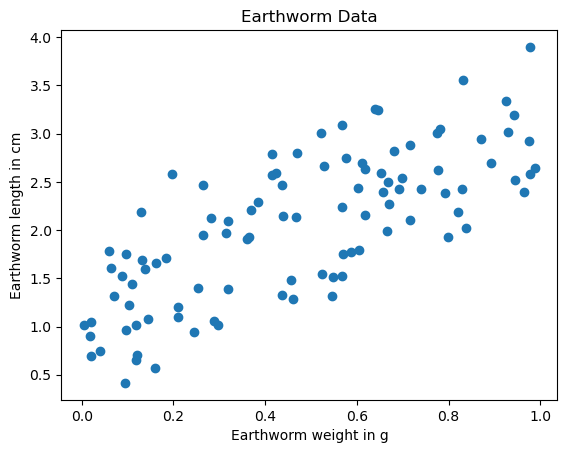

In [4]:
# Plotting the points
plt.scatter(x, y)
plt.title("Earthworm Data")
plt.xlabel("Earthworm weight in g")
plt.ylabel("Earthworm length in cm")
plt.show()

You've probably seen a "line of best fit" plot tons of times - that's linear regression, and we'll go into why and how it works. 

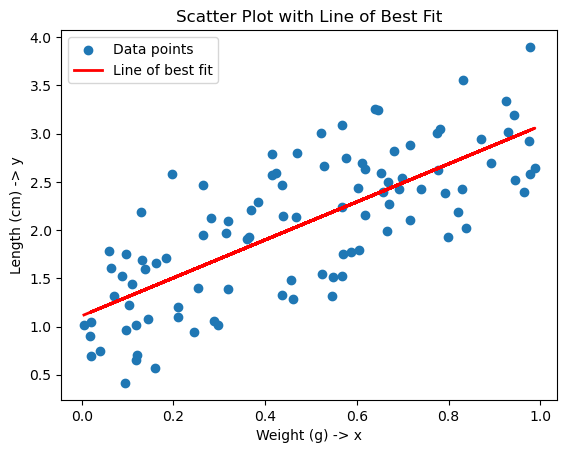

In [9]:
# find line of best fit
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

# Plot data and line of best fit
plt.scatter(x, y, label='Data points')
plt.plot(x, y_pred, color='red', linewidth=2, label='Line of best fit')
plt.xlabel('Weight (g) -> x')
plt.ylabel('Length (cm) -> y')
plt.title('Scatter Plot with Line of Best Fit')
plt.legend()
plt.show()


If we wanted to write our mathematical formula for fitting a model to this data, we would write: 

$y_{\text{length}} = \beta_0 + \beta_1 \cdot x_{\text{weight}}$ (notice that this is just y = mx + b)! 

### The test train-split

We don't want to fit our model on all the data we have, because we wouldn't be able to evaluate how good the model is on "unseen" data. This would be a bit like playing poker in practice rounds but you knew what cards the other players had. But, in real competitions, you wouldn't know. So you'd seem really good in practice but really bad in real games! 

This is extremely important: 

**DON'T TRAIN YOUR MODEL WITH TEST DATA!**

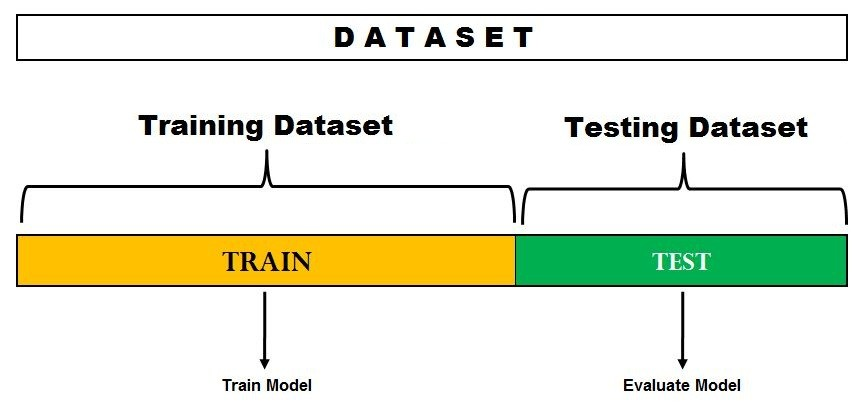

Fortunately, (almost?) everything you need is already available as a function. Try to rely on these built-in functions from different libraries for simplicity and time savings!

Aside: I constantly manually inspect objects or print them out so I know what I'm working with. 

In [5]:
# Split the data into training and testing sets 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [6]:
x_train[0:5]

array([[0.15896958],
       [0.58651293],
       [0.52184832],
       [0.94466892],
       [0.79915856]])

In [7]:
y_train[0:5]

array([[0.57231037],
       [1.77132104],
       [3.00516766],
       [2.51561043],
       [1.9244376 ]])

In [8]:
# we did an 80 / 20 split which is common 
print(f"Total size of x: {len(x)}\n size of x_train: {len(x_train)}\n size of x_test: {len(x_test)}")

Total size of x: 100
 size of x_train: 80
 size of x_test: 20


### Fitting our first model!

Are you ready for the big reveal? When we say "fitting a model" or you hear someone say they have a machine learning model, they just have coefficient estimates. That's all it is, that's the whole game. 

In [9]:
# Fit the model 
model = LinearRegression() 
model.fit(x_train, y_train)

LinearRegression()

Here are the coefficients: 

In [10]:
# Print the results 
print("Coefficients:", model.coef_) 
print("Intercept:", model.intercept_) 

Coefficients: [[1.99990042]]
Intercept: [1.10517591]


### Interpreting Results

This is what sets you apart from a machine.

First, we can write our model based on the formula from above (the little carrot or "hat" indicates a predicted or estimated value): 

$\hat{y_{\text{length}}} = \hat{\beta_0} + \hat{\beta_1} \cdot x_{\text{weight}} = 1.1 + 1.99 \cdot x_{\text{weight}}$

We interpret these results as follows: 

1. at weight = 0g, we think on average a given earthworm will be 1.13 cm long. Of course, 0g is not a possible weight, so this intercept is not particularly meaningfull.
2. But, as we plug in weights we see the magic. For each 1 unit increment in weight, we expect to see length increase by 1.95 cm. 


### Some Predictions by Hand

To predict values, all we have to do is plug in values for $x_{weight}$. Say we find a worm that is 2g, how long do we think it is? 

$\hat{length} = 1.11 + 1.99 * 2 = 5.09 \text{ cm long}$ 

All we're doing is plugging in "new" values and predicting. Of course, we could just measure how long our worm is to confirm, but sometimes this isn't possible with your data. For example, if you're predicting the result of an NFL football game that hasn't happened yet. However, say we measure the worm and it's 5.5 cm long. So we were off by a little bit. This is the **error** of our prediction. Formally: 

$\text{error} = y - \hat{y} = 5.5 - 5.09 = 0.41$

Of course, we don't want to do this by hand for hundreds of new observations. We can confirm that we did the math correctly by hand with  ```model.predict()```

In [11]:
# what if we want to do this with code? 
new_obs = np.array([[2]]) # our 2g worm 
pred = model.predict(new_obs)
pred[0][0]

5.104976758498696

In [12]:
# on more than one observation
# _pred for prediction is a common convention
y_pred = model.predict(x_test)

y_pred[0:5]

array([[2.74708062],
       [2.04243165],
       [1.52290863],
       [2.25701155],
       [1.23346452]])

### Metrics for evaluating model fit

Of course, one of the most important things we want to check is **"how well does our model fit the data?"** This is a fundamental part of modeling - of course you can cram variables into a model and claim "this is great, we should just use every variable!" but that will lead to **overfitting** or matching the data too closely. We want a parsimonius model, or one that fits the data well with the fewest variables as possible. 

### Interlude: overfitting 

This is easiest to explain visually. We don't want our model to follow the data too closely, or it will be inaccurate when it sees new data. However, if we don't include enough variables, it won't be able to understand the structure in the data. We want to be just right. 

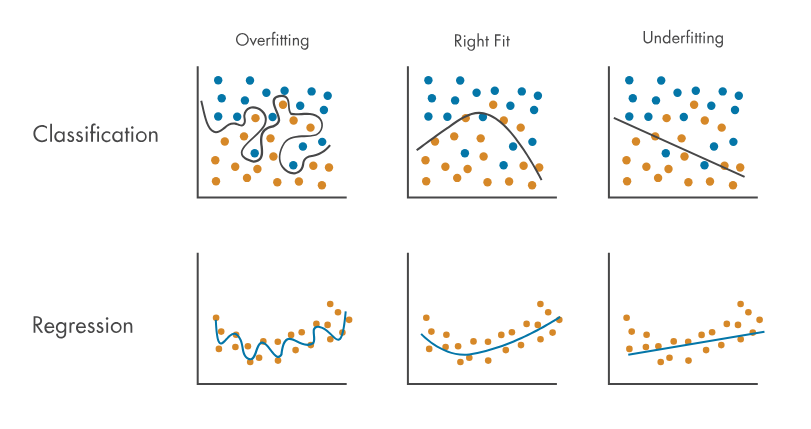

Now, since we only have 1 variable in our dataset, we can't really compare this to other models but we will in the next section. There are usually no hard and fast rules for what makes a "good" model, so it's helpful to compare them. 

$R^2$ = the proportion of variance in the target variable explained by the covariates. The formula for this is complicated so we won't worry about it for now. 


**Mean Squared Error** or MSE: $= \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$ : this is a way to measure how inaccurate our predicted values are compared to the true y values.

Again, when math looks scary, the best thing to do is try to write it out and interpret. [Let's write out the sum above: 

$
\begin{aligned}
MSE &= \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)\\
&=  \frac{1}{n} [(y_1 - \hat{y_1})^2 + (y_2 - \hat{y_2})^2 + \dots + (y_n - \hat{y_n})^2]
\end{aligned}
$

MSE is almost like sounding out a word when you're learning to read. The "mean" is the average which is the 1/n at the front. That is, divide the sum by n. Then, the "errors" is the actual points minus the predicted points, and the squared part is just squaring these values. We often use the letter $n$ to signify an unknown (but finite) number of data points. We want to be able to manipulate things in a general sense. 


In [31]:
# print these results out manually 
e = y_test - y_pred
n = e.shape[0] # this is me forgetting python syntax 
mse = (1/n) * (e**2).sum()
mse

0.2027901571745524

In [23]:
# Evaluate the model with builtin functions 
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) 

print("Mean Squared Error:", mse) 
print("R-squared:", r2)

Mean Squared Error: 0.20279015717455237
R-squared: 0.5800397295913791


Graphically, you'll see linreg represented like this. The black dots are the data, and the red lines to the blue line is the error. Mathematically, we're "projecting" the data points onto the line. a>



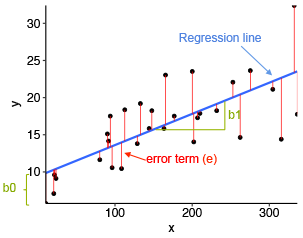

### Math Interlude: How does it solve for the coefficients on the backend...? 

I would be remiss if I didn't walk you through at least one "proof". Linear algebra is the language of machine learning, and it's used extensively in ML. Let's look at the formulation for linear regression and how it's solved mathematically. The X and beta below are matrices and the epsilon is assumed to be normally distributed (that's what that N means). You'll hear about normality assumptions when you're working with linear regression. I'm being a little lazy and not checking the assumptions in our model above. 

$
y = X\beta + \epsilon, \ \ \ \epsilon \sim N(\mu, \sigma^2)
$

Conceptually, we want to **minimize** the errors, that's why this is sometimes called OLS or ordinary least squares. We want the least squared value. "argmin" means we want to find the argument, beta, that results in the smallest value of this. If you've taken calculus, you know that you minimize equation by taking its derivative and setting the whole thing to 0. Since these are matrices, we call that the gradient.

Note that gradients are kind of complicated so we're just going to write it down...

$
\begin{aligned}
\epsilon &= argmin_{\beta} || y - X\beta||_{2}^2 \\
\frac{\partial}{\partial \beta} &= -2X^Ty + 2X^T X\beta = 0 \\
&\text{now we just set equal to zero and use some linear algebra to solve}\\
&X^T X\beta = X^Ty \\ 
\hat{\beta} &= (X^TX)^{-1}X^Ty \\ 
\end{aligned} 
$

# Other Supervised Learning Methods

So that's the basic idea. Of course, sometimes we spend 75% of the time cleaning the data to get it in good enough shape to model it. We won't go over that here since you should have seen it if you took data analysis! To recap: 

1. Identify the question we want to answer.
2. Do EDA if necessary. 
4. Identify possible models and approaches.
5. Fit the models.
6. Evaluate the models for accuracy.
7. Interpret and communicate your results (or deploy to production).

Keep these steps in mind. In the interest of time we won't go as in-depth on each of these methods, and the math gets quite complicated, but I want to show you at a high level how to get started. 

## Logistic Regression

You can do a huge amount of work with linear and logistic regression. Sometimes, say with government data, your models have to be **interpretable**, which means we can actually tell what the model is doing. Some models, called black box models, like neural nets, aren't as interpretable. So in some cases, you're required by law to use certain models! This isn't necessarily bad - if you're automatically rejecting a loan application at a bank, you want to be able to explain why. Interpretability here is knowing what the betas are. 

I won't get into the math, but logistic regression is a transformation of linear regression that allows us to use a linear model, but output probabilities, which are between 0 and 1. We would write that as $p \in [0,1]$. The E looking character, epsilon, means "in" and the brackets mean "from 0 to 1".

Here's the set up: we want to predict the probabilities of a binary outcome. Say, whether or not it will rain on a given day. With linear regression, we would output numbers $\in [-\infty, \infty]$, so we need a new model. After we predict everything, we'll choose a cutoff probability, say 0.5, to say if the event happens or not. 

Let's try with a real data set. Say we want to use a few attributes and try to predict the sex of a given penguin. 

In [13]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

In [14]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [15]:
# remove nulls, we want to predict sex. Might crash if we don't. 
penguins = penguins.dropna()

# Select features and target variable 
X = penguins.drop(columns=['bill_length_mm', 'bill_depth_mm', 'sex', 'species', 'island']) 
y = penguins['sex'] 

X.columns

Index(['flipper_length_mm', 'body_mass_g'], dtype='object')

In [16]:
# Split the data into training and testing sets 
# note the random_state argument, we want to be able to reproduce our work and this is randomly splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [17]:
# look at y_train, etc here if we want 
y_test

30     Female
317    Female
79       Male
201    Female
63       Male
        ...  
288    Female
4      Female
83       Male
319      Male
66     Female
Name: sex, Length: 67, dtype: object

In [18]:
# Fit the Logistic Regression Model 
model = LogisticRegression(max_iter=200) 
model.fit(X_train, y_train) 

LogisticRegression(max_iter=200)

In [19]:
# Make predictions and evaluate the model 
y_pred = model.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred) 
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 68.66%


It's always helpful to try to inspect your data so you can wrap your head around things. Looking at ```y_pred```, we see that it's output predictions of each penguin which we compared against ```y_test```.

In [20]:
y_pred

array(['Female', 'Male', 'Female', 'Female', 'Male', 'Male', 'Male',
       'Female', 'Female', 'Female', 'Male', 'Male', 'Male', 'Female',
       'Male', 'Female', 'Female', 'Female', 'Female', 'Female', 'Male',
       'Female', 'Male', 'Female', 'Female', 'Female', 'Male', 'Male',
       'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male',
       'Male', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Male', 'Male', 'Female',
       'Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male',
       'Female', 'Male', 'Female', 'Female', 'Male', 'Male', 'Male',
       'Female', 'Male', 'Male', 'Female'], dtype=object)

Cool, so we can predict with 68.7% accuracy the sex of a penguin based on flipper length and body mass. If males tend to be heavier than females and it helps us make predictions, we would say it has a lot of **predictive power**.

This is great, but we only used two covariates: ```flipper_length_mm``` and ```body_mass_g```. Also, note that this is multivariate logistic regression. That sounds complicated, but you did it in a few lines of code! Let's try adding more variables and see what happens. 

In [21]:
X_2 = penguins.drop(columns=['sex', 'species', 'island']) 
y_2 = penguins['sex'] 

X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42) 

model_2 = LogisticRegression(max_iter=200) 
model_2.fit(X_train, y_train) 

y_pred = model_2.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred) 
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 88.06%


Wow, that's a huge jump in accuracy! If we choose to use this second model, we call that **model selection**. That is, we have a few competing models and we want to figure out which is best. This is a basic way to do it, just choose the model with higher accuracy. There are tons and tons and tons of different strategies and different metrics you can compare, so you can dive into that after this class. 

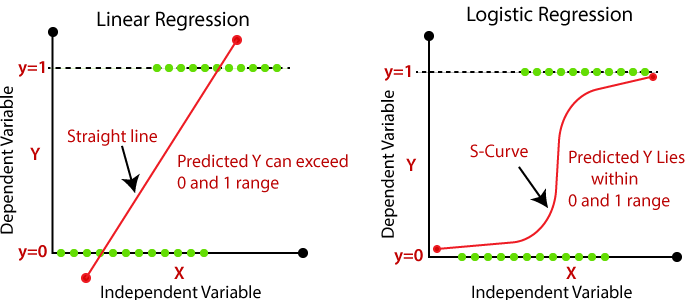

## Ridge Regression

I will spare you the math details, as it starts to get pretty dense here.

How do we select what features of the data we want to use to fit our model? There are tons of methods, but a few common methods are ridge regression and lasso regression. Mathematically, we're putting a "penalty" on the solution, which causes the **unimportant variables to shrink to small values.** We'll fit it very similarly to how we did previously. 

In [22]:
mtcars = sm.datasets.get_rdataset('mtcars', 'datasets').data
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
rownames,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [23]:
X = mtcars.drop(columns=['mpg']) 
y = mtcars['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# again, some math-y reasons but we have to scale the features 
# subtract mean, divide by standard deviation
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

# fit model 
# we will tune the alpha parameter 
ridge = Ridge(alpha=1.0)  
ridge.fit(X_train, y_train)

# Make predictions on the test set 
y_pred = ridge.predict(X_test)

mse = mean_squared_error(y_test, y_pred) 
print(f'Mean Squared Error: {mse}')

# coeff, the betas 
print('Coefficients:', ridge.coef_)

Mean Squared Error: 6.704576128900543
Coefficients: [-0.47771775  0.26093948 -0.90801512  0.75376957 -2.35739916  1.03243393
 -0.18979023  0.56676246  0.68699522 -0.61771351]


## Cross Validation and Tuning

One of the most important topics in ML is validating your model and tuning parameters to find the best model. In ridge regression, the parameter is usually called $\lambda$, lambda. We call these *hyperparameters*, meaning you choose them rather than estimating them from the data. In scikitlearn they call the parameter alpha ($\alpha$) but they're the same thing. You'll often see these letters used for hyperparameters: $\alpha, \beta, \lambda, \gamma, \eta$. BUT, no matter how confusing the notation gets, it's just like variable assignment. Just like writing ```beta = 10``` in code is mathematically written as $\beta = 10$. 

We're trying to train a model to predict accurately on unseen data. Above, we used a basic train/test split, but what if there are some weird patterns in the test data that we're missing? We can "simulate" the model seeing a variety of different data sets by using cross validation. There are a variety of methods, but k-fold cross validation is a pretty easy one to start with. To tune our parameter, we could just fit the model a bunch of times with different parameters and check the MSE on the test set. But we can do cross validation to make the model more robust to unseen data. 

Note that we are using ONLY the training set for the below graphic. 

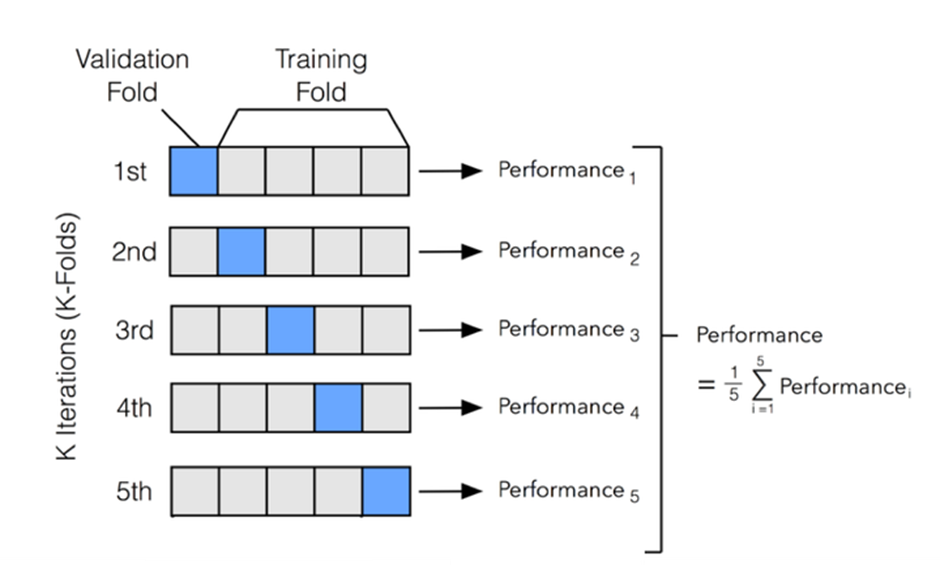

Let's see it in practice. We want to find the alpha value that minimizes the MSE, mean squared error (but note that you could minimize other metrics!). We could search a trillion values, but we don't have the computation power for that. We'll start with 5.

In [24]:
# Define the model 
ridge = Ridge() 

# Define the grid of alpha values to search 
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0, 200.0]} 

# Use GridSearchCV to find the best alpha 
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error') 
grid_search.fit(X_train, y_train) 

# Get the best alpha parameter 
best_alpha = grid_search.best_params_['alpha'] 
print(f'Best alpha: {best_alpha}') 

# Fit the ridge regression model with the best alpha on the entire training data 
best_ridge = Ridge(alpha=best_alpha) 
best_ridge.fit(X_train, y_train) 

# Make predictions on the test set 
y_pred = best_ridge.predict(X_test) 

# Evaluate the model 
mse = mean_squared_error(y_test, y_pred) 
print(f'Mean Squared Error: {mse}') 

# Display the coefficients
print('Coefficients:', best_ridge.coef_)

Best alpha: 10.0
Mean Squared Error: 6.761728912545045
Coefficients: [-0.62391432 -0.62837901 -0.78615301  0.62829868 -1.13997012  0.3182993
  0.28787757  0.62717877  0.53114878 -0.70528538]


# Some more supervised methods

## Lasso Regression

Lasso regression is similar to ridge, but because the penalty is slightly different under the hood, lasso will **shrink some coefficients to zero** while ridge will not. 

Here's a resource if you want to learn more: https://www.cvxpy.org/examples/machine_learning/lasso_regression.html

## Random Forest (for Classification or Regression tasks) 

I'm going to let you all work through this one on your own and see if you can figure it out :) 

This is a pretty nice tutorial if you have time: https://www.kaggle.com/code/prashant111/random-forest-classifier-tutorial

## K Nearest Neighbors (KNN) 

Actually a very easy to understand algorithm, see if you can figure it out! 

https://scikit-learn.org/1.6/modules/neighbors.html 

and a good walkthrough of that: https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn

# Unsupervised Learning

So what if we **don't** know what the labels (or true y values, whatever you want to call them) for our data are? We're not trying to predict a value and check the accuracy. We're trying to find interesting things in the data even if we don't necessarily know what we're looking for. 

Say you own a store and you want to try to "group" customers together to identify which of them might share attributes to better target marketing. You could use a clustering method to "group" people together, but there's no baseline truth about what group these people should be in. 

## k-means

We're going to use the iris data set, which is very commonly used in ML demonstrations - it's data on 3 different types of flowers. We're going to cheat a bit here and pretend we don't know the actual labels so we can demonstrate the method. Here's some pseudo-code of how the algorithm works. We could code this by hand, but it would be tedious! 

1. Initialize centroids
   - Choose the number of clusters (K)
   - Randomly select K data points as initial centroids

2. Repeat until convergence or maximum iterations:
   a. Assignment step:
      - For each data point in the dataset:
          - Calculate the distance from the data point to each centroid
          - Assign the data point to the nearest centroid

   b. Update step:
      - For each cluster:
          - Calculate the mean (average) of all data points assigned to that cluster
          - Update the centroid to the calculated mean

3. Return the final centroids and the cluster assignments



**Important**: some algorithms *have* a solution, what we would call a closed-form solution or a deterministic approach. Both of those mean there is a singular solution. However, if you get more into ML, some methods **don't** return the same solution and there's some randomness that can be tweaked with starting conditions and lots of other factors! If you've ever heard of approximations, that's what's happening there. That's why with some of these methods we initialize a random state, so when I present this to you I don't get a different number :) you'll also want to set maximum iterations for some methods because it **iterates** through the data like above. Sometimes the algorithms get stuck and would repeat infinitely, so we want to break that infinite repetition. 

In [15]:
# Step 1: Import the Iris dataset
iris = load_iris()

# don't need this, but just so we can view it 
iris_view = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_view['target'] = iris.target 

iris_view

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


C:\Users\WillTirone\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\WillTirone\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


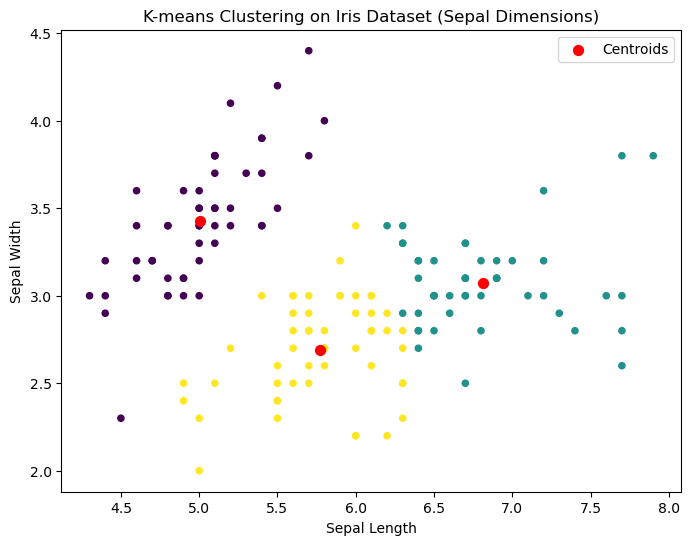

In [17]:
X = iris.data[:, :2]  # Use only the first two features (sepal length and sepal width)
y = iris.target

# Step 2: Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Step 3: Plot the K-means clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=20)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='red', label='Centroids')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-means Clustering on Iris Dataset (Sepal Dimensions)')
plt.legend()
plt.show()


Here are the actual data points with their flower labels - look at how separable the setosa class is compared to the others. We say data is **separable** if you could easily draw a line between it and the other classes. If data is separable, it's much easier to cluster / classify. 

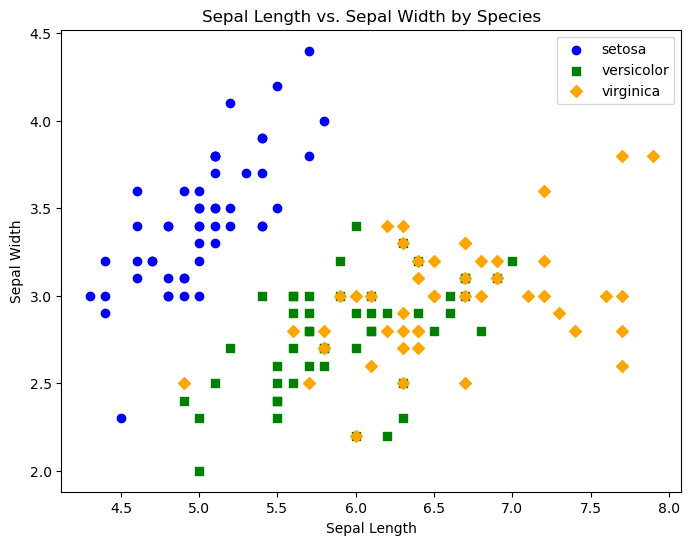

In [78]:

species_names = iris.target_names

# Create a DataFrame for easier handling and plotting
df = pd.DataFrame(X, columns=['Sepal Length', 'Sepal Width'])
df['Species'] = [species_names[label] for label in y]

# Plot the sepal length and sepal width
plt.figure(figsize=(8, 6))

# Define colors and markers for each species
colors = ['blue', 'green', 'orange']
markers = ['o', 's', 'D']

for species, color, marker in zip(species_names, colors, markers):
    subset = df[df['Species'] == species]
    plt.scatter(subset['Sepal Length'], subset['Sepal Width'], c=color, label=species, marker=marker)

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs. Sepal Width by Species')
plt.legend()
plt.show()


## PCA 



bias-variance tradeoff 

# Final Notes

- look at the assumptions your model is making and whether or not you think those are true. Nothing is usually ever linear, but we make simplifying assumptions

Remember our framework for modeling: 
1. Identify the question we want to answer.
2. Perform EDA to get our data in shape (we won't do that here!)
3. Identify possible models and approaches.
4. Fit the models.
5. Evaluate the models for accuracy and check assumptions.
6. Interpret and communicate your results (or deploy to production).

# Resources 

Here are some good books about ML if you want to learn more: 
1. Intro to Statistical Learning (ISL): https://www.statlearning.com/ A more code-focused intro to tons of different methods.
2. These are my notes that I used when I was prepping for job interviews, they're pretty math intense but not bad if you need to answer questions about assumptions in an interview, etc: https://github.com/WillTirone/ml_crash_course/blob/main/ML_interview_review.pdf
3. Learning some basic linear algebra is essential for ML, but it's not too bad! A resource like this is usually a good place to start: https://personal.math.ubc.ca/~carrell/NB.pdf

There are millions of resources, I would suggest finding either a course or textbook that looks appealing and work through the whole thing. I tend to like textbooks for difficult topics, but you can learn this in whatever way you prefer. 